In [21]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
#%load visuals.py

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = '/home/test/Desktop/titanic/titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [18]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [28]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print (accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


In [29]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [30]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


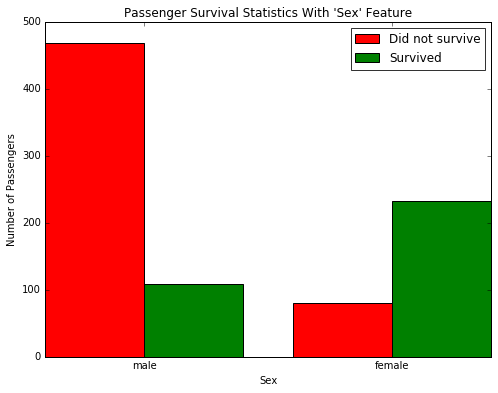

In [31]:
vs.survival_stats(data, outcomes, 'Sex')

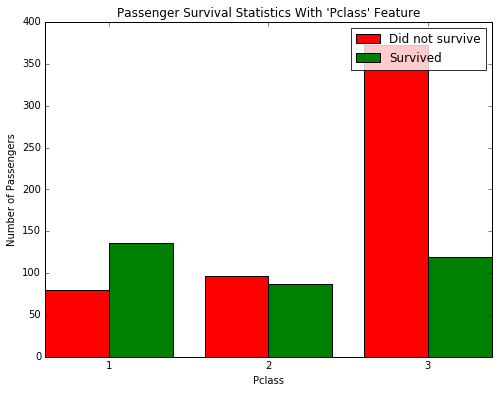

In [32]:
vs.survival_stats(data, outcomes, 'Pclass')

In [41]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for index, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger.Sex=="female":
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [42]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In [43]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for index, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger.Sex == "female":
            predictions.append(1)
        elif (passenger.Sex == "male") and (passenger.Age < 10):
            predictions.append(1)
        else:
            predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [44]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


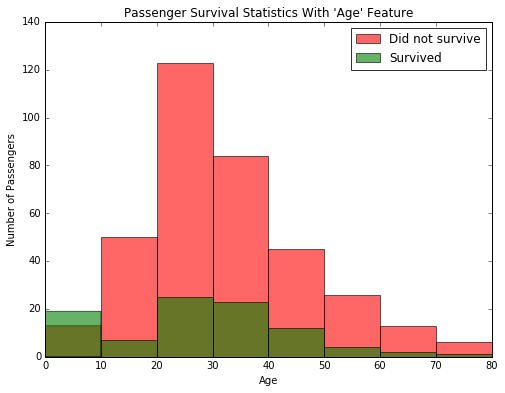

In [45]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

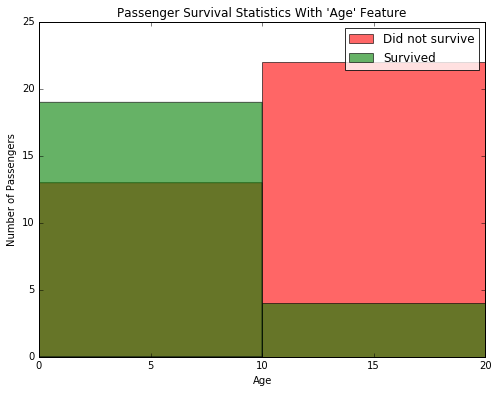

In [90]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

In [107]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    #Considered all females are survived
    #Males with age less than 12, Passenger classes of either 1 or 2, or Passenger parch not equal to zero. 
    
    predictions = []
    for index, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger.Sex == "female":
            predictions.append(1)
        elif (passenger.Sex == "male") and (passenger.Age < 12) and (passenger.Pclass <3) and (passenger.Parch != 0):
            predictions.append(1)
        else:
            predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

# Influenced factors to attain the 80% accuracy
1) Considered all females are survived
or 
1) Males with age less than 12
2) Passenger classes of either 1 or 2
3) Passenger parch not equal to zero. 

When increased the age more than 18. The accuracy is dratically decreased. So planned to decrease the age instead. 
While working on Pclass 3, the accurary is again decreasing, So planned to work only on 1 or 2.
When Parch values are zero, the accuracy is losing the value. So considered non-zero values.
By working on these values, the accuracy attained is atleast 80%.


In [112]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.02%.


# Supervised learning can be applied in many real world applications. In this instance I choose to apply supervised learning in "Exit Polls Survey Swing".

The outcome variable I am trying to obtain is accuracy score for this swing prediction during/before elections. And predict electoral landslide.

The two features of data to be used in this case are,
1) Website news article (reliable) hits to Pro-Government page or Anti-Government page according to demography.
2) People's happines index value.
3) Political activities held and local attendees for those movements. 

I believe these data values can be helpful in making the predictions. 